<a href="https://colab.research.google.com/github/successfuljosh/Predictive_analytics/blob/main/Predictive_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Analysis Using LSTM**
**Stock price of Microsoft Corporation (MSFT) as reported by the National Association of Securities Dealers Automated Quotations (NASDAQ)**

**The long short term memory Technique**
Long-term memory (LSTM) is a deep learning artificial recurrent neural network (RNN) architecture

Unlike traditional feed-forward neural networks, LSTM has feedback connections. It can handle single data points (such as pictures) as well as full data sequences (such as speech or video).

**#Importing the Libraries**

In [2]:
# !pip freeze
!pip install keras

In [3]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
# from keras.optimizers import adam
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

**#Get the Dataset**

In [4]:
#Get the Dataset
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
data_dir = '/content/gdrive/MyDrive/StockAnalysis/'
os.chdir(data_dir)

Mounted at /content/gdrive


In [5]:
df = pd.read_csv('MSFT.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061378,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063570,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064667,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063022,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061926,47894400


In [6]:
df.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9008 entries, 1986-03-13 to 2021-12-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9008 non-null   float64
 1   High       9008 non-null   float64
 2   Low        9008 non-null   float64
 3   Close      9008 non-null   float64
 4   Adj Close  9008 non-null   float64
 5   Volume     9008 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 492.6 KB


In [8]:
#Print the shape of Dataframe  and Check for Null Values
print('Dataframe Shape: ', df.shape)
print('Null Value Present: ', df.isnull().values.any())

Dataframe Shape:  (9008, 6)
Null Value Present:  False


**Adjusted close ** is the closing price after adjustments for all applicable splits and dividend distributions

We use the adjusted closing price

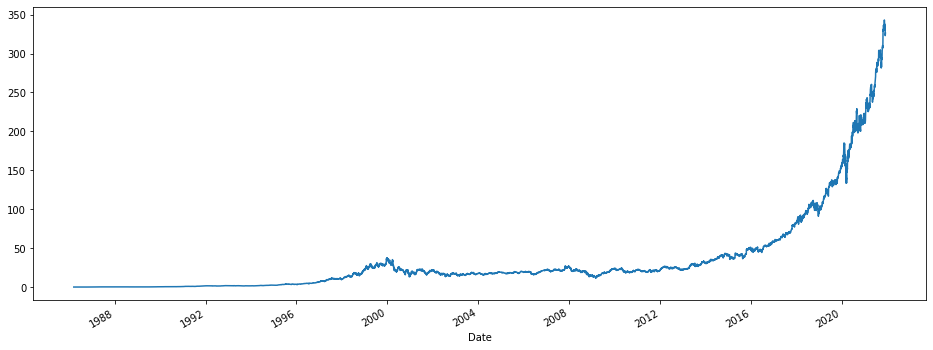

In [9]:
df['Adj Close'].plot(figsize=(16,6))

**Setting the Target Variable and Selecting the Features**

In [10]:
#Set Target or Output Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

**Scaling**
To decrease the computational cost of the data in the table, we will scale the stock values to values between 0 and 1.

In [11]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
1986-03-13,0.000000,0.000027,0.000000,1.000000
1986-03-14,0.000025,0.000030,0.000025,0.297096
1986-03-17,0.000035,0.000032,0.000036,0.127119
1986-03-18,0.000040,0.000032,0.000030,0.063588
1986-03-19,0.000033,0.000025,0.000025,0.044285


**#Splitting to Training set and Test set**

In [12]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10) #10& for test and 90 for train
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

**#Process the data for LSTM**
LSTM can also be use for images, etc which is why its input data structure is in the form (x,y,d)

In [13]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

**Building the LSTM Model for Stock Market Prediction**

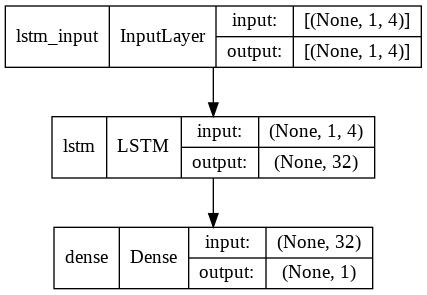

In [14]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

train the LSTM model for 100 epochs with a batch size of 8.

In [15]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
1024/1024 [==============================] - 3s 2ms/step - loss: 69.2985
Epoch 2/100
1024/1024 [==============================] - 2s 2ms/step - loss: 181.6042
Epoch 3/100
1024/1024 [==============================] - 2s 2ms/step - loss: 124.0873
Epoch 4/100
1024/1024 [==============================] - 2s 2ms/step - loss: 65.0019
Epoch 5/100
1024/1024 [==============================] - 2s 2ms/step - loss: 28.7259
Epoch 6/100
1024/1024 [==============================] - 2s 2ms/step - loss: 10.4387
Epoch 7/100
1024/1024 [==============================] - 2s 2ms/step - loss: 4.1529
Epoch 8/100
1024/1024 [==============================] - 2s 2ms/step - loss: 2.3882
Epoch 9/100
1024/1024 [==============================] - 2s 2ms/step - loss: 1.7128
Epoch 10/100
1024/1024 [==============================] - 2s 2ms/step - loss: 1.3597
Epoch 11/100
1024/1024 [==============================] - 2s 2ms/step - loss: 1.1690
Epoch 12/100
1024/1024 [==============================] - 2s 2ms/s

**LSTM Prediction**

In [16]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

**Comparing Predicted vs True Adjusted Close Value – LSTM**

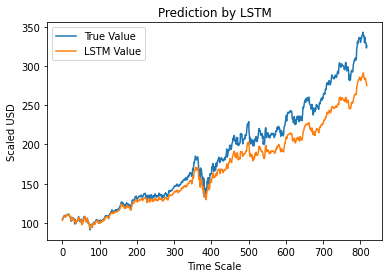

In [18]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()